In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

The Dataset used here is Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.In this problem we are trying to predict the price of houses using Ridge Regression.
Kaggle link for dataset: https://www.kaggle.com/puxama/bostoncsv

In [2]:
#importing Dataset
df=pd.read_csv('Boston.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#lets see what the dataset looks like
df.describe

<bound method NDFrame.describe of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     

In [4]:
#Check if any null values are present in the data
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [5]:
#The column 'Unnamed' is of no use so lets remove it
df=df.drop('Unnamed: 0',axis=1)

In [6]:
#Renaming our target column,'medv' as 'price' 
df.rename(columns={'medv':'price'},inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
#Separating our dependent and independent features
X=df.iloc[:,:13] #independent features
X.shape

(506, 13)

In [8]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
Y=df['price']
Y.shape

(506,)

In [10]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [11]:
# standardize and train/test split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(
   X, Y, test_size=0.3, random_state=10)

We are done with data importing and splitting the data. Now we aim to fit Ridge regression model to it,before that let's understand how Ridge Regression works.


# RIDGE REGRESSION

Ridge regression is used to solve regression problems just like Linear regression. But if we already had Linear regression then why do we need another regression model?
This is because the problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or less samples (n) than input predictors (p) or variables (so-called p >> n problems). Though the model performs best on training data, but fails badly on training data. This is called the problem of overfitting.
Now,Ridge regression comes into picture. It adds additional parameter to SSR(sum of squared residuals) which makes the model fit better on test data.
For better understanding watch this amazing video by Joshua Stammer: https://www.youtube.com/watch?v=Q81RR3yKn30&t=7s

In [12]:
#Fitting Ridge regression with alpha=0
from sklearn.linear_model import  Ridge
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
#these are the coefficients for every feature denoting how the feature affects in predicting the price 
ridge_reg.coef_     

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [13]:
alphas = np.arange(0, 100, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_pred = ridge_reg.predict(X_test)
    print("The regression coefficients with alpha={}".format(alpha))
    print(ridge_reg.coef_ )
    print("\nR-Squared:", round(r2_score(y_test, ridge_pred), 4))
    

The regression coefficients with alpha=0
[-1.32140428  1.51483181 -0.16626579  0.41157944 -1.77116763  2.35282088
  0.31849871 -3.25664538  2.63257618 -2.05946639 -1.75520086  1.18114343
 -3.88704342]

R-Squared: 0.6996
The regression coefficients with alpha=1
[-1.30584426  1.4917043  -0.1863003   0.41655355 -1.73486618  2.36830353
  0.30524134 -3.21345944  2.54070517 -1.97663088 -1.74636216  1.17975058
 -3.86728562]

R-Squared: 0.6998
The regression coefficients with alpha=2
[-1.29105302  1.46971561 -0.20450754  0.42119225 -1.700188    2.38276214
  0.29261641 -3.1715125   2.45527576 -1.9003947  -1.7379415   1.17832177
 -3.84792476]

R-Squared: 0.7
The regression coefficients with alpha=3
[-1.27696152  1.44877097 -0.22110363  0.42553088 -1.66701765  2.39627795
  0.28057257 -3.13075035  2.37560801 -1.83003297 -1.72989981  1.17685583
 -3.82894351]

R-Squared: 0.7001
The regression coefficients with alpha=4
[-1.26350954  1.42878706 -0.23627352  0.42959984 -1.63525178  2.40892291
  0.26906

The regression coefficients with alpha=75
[-0.85804156  0.87372916 -0.46579451  0.51638011 -0.75317998  2.52550165
 -0.06289015 -1.65995563  0.67459858 -0.63155712 -1.45593094  1.02868897
 -2.97198452]

R-Squared: 0.6843
The regression coefficients with alpha=76
[-0.8552568   0.87053533 -0.46646756  0.5166203  -0.74847698  2.52328895
 -0.06496604 -1.64922676  0.66669671 -0.62828083 -1.45357688  1.02660916
 -2.96398241]

R-Squared: 0.684
The regression coefficients with alpha=77
[-0.85250679  0.86739306 -0.46712756  0.51684886 -0.74386107  2.52104359
 -0.06701265 -1.63862794  0.65892491 -0.62509069 -1.45123889  1.02453581
 -2.95604352]

R-Squared: 0.6837
The regression coefficients with alpha=78
[-0.8497908   0.86430108 -0.46777494  0.51706605 -0.7393301   2.51876674
 -0.06903066 -1.62815658  0.6512797  -0.62198384 -1.44891665  1.02246902
 -2.94816691]

R-Squared: 0.6833
The regression coefficients with alpha=79
[-0.8471081   0.86125821 -0.46841014  0.51727209 -0.734882    2.51645954
 -

It can be seen that as we keep on increasing the alpha value, the regression coefficients keep coming close to 0.

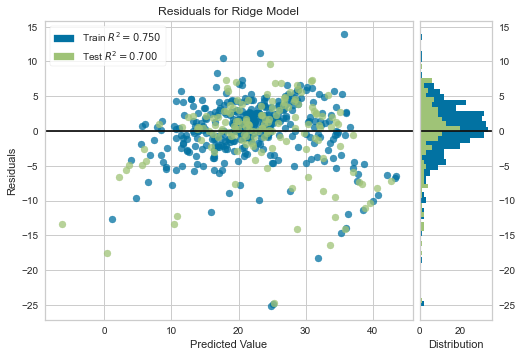

In [14]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
model = ResidualsPlot(Ridge())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()